In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import scipy.stats as st

data_science_clean = pd.read_csv("Resources/Data_Science_Salaries_Clean.csv")
data_science_clean.head()

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [2]:
data_science_clean.info()

job_title_count= data_science_clean.groupby("Job Title")
job_title_count["Job Title"].count().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2228 non-null   int64 
 1   Job Title           2228 non-null   object
 2   Employment Type     2228 non-null   object
 3   Experience Level    2228 non-null   object
 4   Expertise Level     2228 non-null   object
 5   Salary              2228 non-null   int64 
 6   Salary Currency     2228 non-null   object
 7   Company Location    2228 non-null   object
 8   Salary in USD       2228 non-null   int64 
 9   Employee Residence  2228 non-null   object
 10  Company Size        2228 non-null   object
 11  Year                2228 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 209.0+ KB


Job Title
Data Engineer                702
Data Scientist               635
Data Analyst                 459
Machine Learning Engineer    300
Analytics Engineer           132
Name: Job Title, dtype: int64

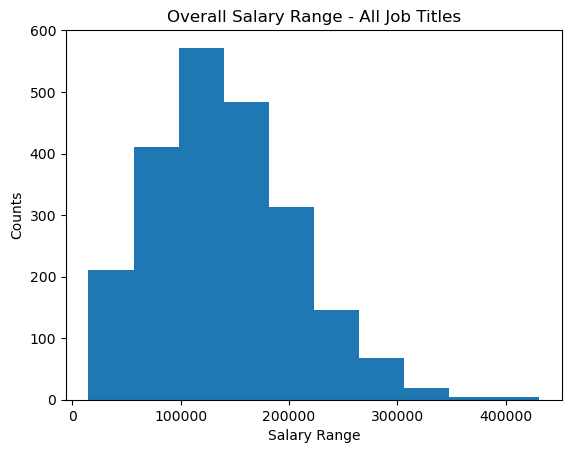

139408.97845601436
133816.0
0    100000
Name: Salary in USD, dtype: int64


<Figure size 640x480 with 0 Axes>

In [3]:
plt.hist(data_science_clean['Salary in USD'])
plt.xlabel('Salary Range')
plt.ylabel('Counts')
plt.title('Overall Salary Range - All Job Titles')
plt.show()
print(data_science_clean['Salary in USD'].mean())
print(data_science_clean['Salary in USD'].median())
print(data_science_clean['Salary in USD'].mode())

# Save the figure
plt.savefig("data visuals/overall_salary_range.png")


In [4]:
#setup dataframes for each job title

data_analyst = data_science_clean.loc[data_science_clean["Job Title"] == "Data Analyst" , :]


data_engineer = data_science_clean.loc[data_science_clean["Job Title"] == "Data Engineer" , :]


data_scientist = data_science_clean.loc[data_science_clean["Job Title"] == "Data Scientist" , :]


machine_learning_engineer = data_science_clean.loc[data_science_clean["Job Title"] == "Machine Learning Engineer" , :]


analytics_engineer = data_science_clean.loc[data_science_clean["Job Title"] == "Analytics Engineer" , :]


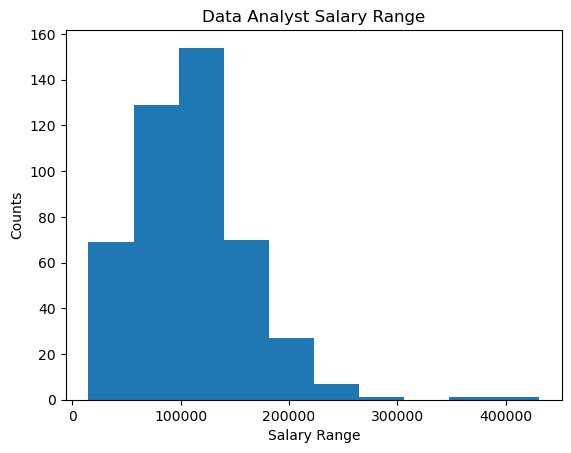

Data Analyst central tendency
109500.37690631808
105320.0
0    80000
Name: Salary in USD, dtype: int64
-------------------------------------------------------------------
Data Analyst central tendency
NormaltestResult(statistic=8.183697509768582, pvalue=0.01670831540762746)
NormaltestResult(statistic=79.73521237393825, pvalue=4.849741899443221e-18)
-------------------------------------------------------------------
The lower quartile of Data Analyst salary is: 72000.0
The upper quartile of Data Analyst salary is: 136552.5
The interquartile range of Data Analyst salary is: 64552.5
The the median of salary Data Analyst is: 105320.0 
Values below -24828.75 could be outliers.
Values above 233381.25 could be outliers.
-------------------------------------------------------------------
The minimum median income of the potential outliers is 236600
The maximum median income of the potential outliers is 430967
-------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [5]:
#Data Analyst summary analysis

plt.hist(data_analyst['Salary in USD'])
plt.xlabel('Salary Range')
plt.ylabel('Counts')
plt.title('Data Analyst Salary Range')
plt.show()
print(f"Data Analyst central tendency")
print(data_analyst['Salary in USD'].mean())
print(data_analyst['Salary in USD'].median())
print(data_analyst['Salary in USD'].mode())

# Save the figure
plt.savefig("data visuals/data_analyst_salary_range.png")

print("-------------------------------------------------------------------")

print(f"Data Analyst central tendency")
print(st.normaltest(data_analyst["Salary in USD"].sample(100)))
print(st.normaltest(data_analyst["Salary in USD"].sample(300)))

print("-------------------------------------------------------------------")

quartiles = data_analyst['Salary in USD'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Data Analyst salary is: {lowerq}")
print(f"The upper quartile of Data Analyst salary is: {upperq}")
print(f"The interquartile range of Data Analyst salary is: {iqr}")
print(f"The the median of salary Data Analyst is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

data_analyst_quartiles = data_analyst.loc[(data_analyst['Salary in USD'] < lower_bound) |
                                          (data_analyst['Salary in USD'] > upper_bound)]
data_analyst_quartiles

print("-------------------------------------------------------------------")

print(f"The minimum median income of the potential outliers is {data_analyst_quartiles['Salary in USD'].min()}")
print(f"The maximum median income of the potential outliers is {data_analyst_quartiles['Salary in USD'].max()}")

print("-------------------------------------------------------------------")

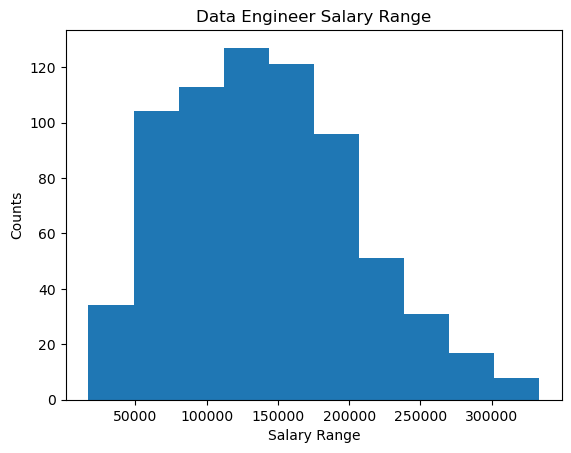

Data Engineer central tendency
142033.87464387465
135223.0
0    80000
Name: Salary in USD, dtype: int64
-------------------------------------------------------------------
Data Engineer central tendency
NormaltestResult(statistic=8.89338046666307, pvalue=0.01171728433947404)
NormaltestResult(statistic=19.066249249074357, pvalue=7.241300667235033e-05)
-------------------------------------------------------------------
The lower quartile of Data Engineer salary is: 72000.0
The upper quartile of Data Engineer salary is: 136552.5
The interquartile range of Data Engineer salary is: 64552.5
The the median of salary Data Engineer is: 105320.0 
Values below -24828.75 could be outliers.
Values above 233381.25 could be outliers.
-------------------------------------------------------------------
The minimum median income of the potential outliers is 235000
The maximum median income of the potential outliers is 333500
-------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [23]:
#Data Engineer Summary analysis

plt.hist(data_engineer['Salary in USD'])
plt.xlabel('Salary Range')
plt.ylabel('Counts')
plt.title('Data Engineer Salary Range')
plt.show()
print(f"Data Engineer central tendency")
print(data_engineer['Salary in USD'].mean())
print(data_engineer['Salary in USD'].median())
print(data_engineer['Salary in USD'].mode())

# Save the figure
plt.savefig("data visuals/data_engineer_salary_range.png")

print("-------------------------------------------------------------------")

print(f"Data Engineer central tendency")
print(st.normaltest(data_engineer["Salary in USD"].sample(200)))
print(st.normaltest(data_engineer["Salary in USD"].sample(500)))

print("-------------------------------------------------------------------")

data_engineer_quartiles = data_engineer['Salary in USD'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Data Engineer salary is: {lowerq}")
print(f"The upper quartile of Data Engineer salary is: {upperq}")
print(f"The interquartile range of Data Engineer salary is: {iqr}")
print(f"The the median of salary Data Engineer is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

data_engineer_quartiles = data_engineer.loc[(data_engineer['Salary in USD'] < lower_bound) |
                                          (data_engineer['Salary in USD'] > upper_bound)]
data_engineer_quartiles

print("-------------------------------------------------------------------")

print(f"The minimum median income of the potential outliers is {data_engineer_quartiles['Salary in USD'].min()}")
print(f"The maximum median income of the potential outliers is {data_engineer_quartiles['Salary in USD'].max()}")

print("-------------------------------------------------------------------")

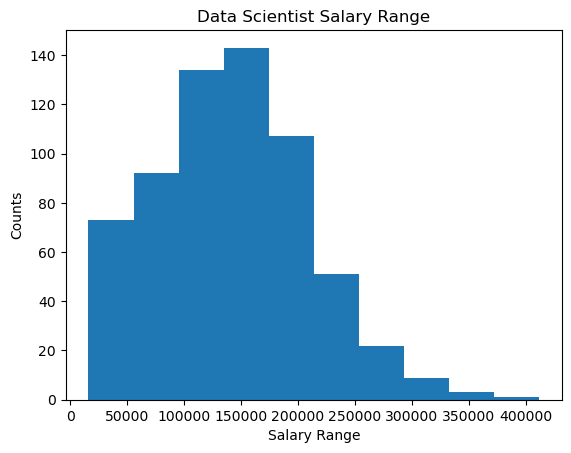

Data Scientist central tendency
141886.16377952756
140000.0
0    100000
Name: Salary in USD, dtype: int64
-------------------------------------------------------------------
Data Scientist central tendency
NormaltestResult(statistic=6.299858247568433, pvalue=0.04285516417126584)
NormaltestResult(statistic=29.04797190816401, pvalue=4.923943317966682e-07)
-------------------------------------------------------------------
The lower quartile of Data Scientist salary is: 93400.0
The upper quartile of Data Scientist salary is: 184217.0
The interquartile range of Data Scientist salary is: 90817.0
The the median of salary Data Scientist is: 140000.0 
Values below -42825.5 could be outliers.
Values above 320442.5 could be outliers.
-------------------------------------------------------------------
The minimum median income of the potential outliers is 323300
The maximum median income of the potential outliers is 412000
-------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [24]:
#Data Scientist summary analysis

plt.hist(data_scientist['Salary in USD'])
plt.xlabel('Salary Range')
plt.ylabel('Counts')
plt.title('Data Scientist Salary Range')
plt.show()
print(f"Data Scientist central tendency")
print(data_scientist['Salary in USD'].mean())
print(data_scientist['Salary in USD'].median())
print(data_scientist['Salary in USD'].mode())

# Save the figure
plt.savefig("data visuals/data_scientist_salary_range.png")

print("-------------------------------------------------------------------")

print(f"Data Scientist central tendency")
print(st.normaltest(data_scientist["Salary in USD"].sample(200)))
print(st.normaltest(data_scientist["Salary in USD"].sample(500)))

print("-------------------------------------------------------------------")

quartiles = data_scientist['Salary in USD'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Data Scientist salary is: {lowerq}")
print(f"The upper quartile of Data Scientist salary is: {upperq}")
print(f"The interquartile range of Data Scientist salary is: {iqr}")
print(f"The the median of salary Data Scientist is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

data_scientist_quartiles = data_scientist.loc[(data_scientist['Salary in USD'] < lower_bound) |
                                          (data_scientist['Salary in USD'] > upper_bound)]
data_scientist_quartiles

print("-------------------------------------------------------------------")

print(f"The minimum median income of the potential outliers is {data_scientist_quartiles['Salary in USD'].min()}")
print(f"The maximum median income of the potential outliers is {data_scientist_quartiles['Salary in USD'].max()}")

print("-------------------------------------------------------------------")

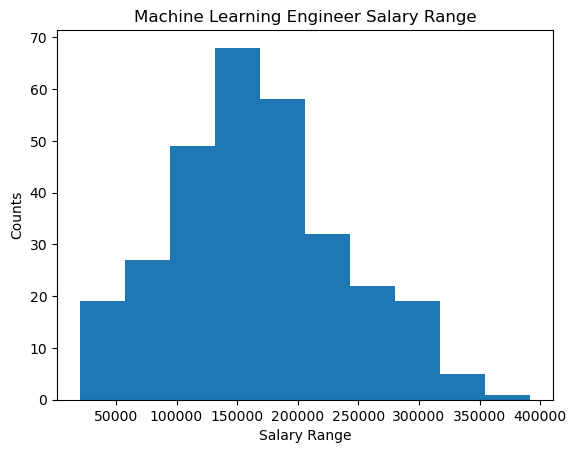

Machine Learning Engineer central tendency
167249.51333333334
161310.0
0    150000
Name: Salary in USD, dtype: int64
-------------------------------------------------------------------
Machine Learning Engineer central tendency
NormaltestResult(statistic=2.4156111328936714, pvalue=0.29885237206107046)
NormaltestResult(statistic=3.632140331181335, pvalue=0.1626637380759426)
-------------------------------------------------------------------
The lower quartile of Machine Learning Engineer salary is: 120000.0
The upper quartile of Machine Learning Engineer salary is: 210550.0
The interquartile range of Machine Learning Engineer salary is: 90550.0
The the median of salary Machine Learning Engineer is: 161310.0 
Values below -15825.0 could be outliers.
Values above 346375.0 could be outliers.
-------------------------------------------------------------------
The minimum median income of the potential outliers is 392000
The maximum median income of the potential outliers is 392000
---------

<Figure size 640x480 with 0 Axes>

In [25]:
#Machine Learning Engineer summary analysis

plt.hist(machine_learning_engineer['Salary in USD'])
plt.xlabel('Salary Range')
plt.ylabel('Counts')
plt.title('Machine Learning Engineer Salary Range')
plt.show()
print(f"Machine Learning Engineer central tendency")
print(machine_learning_engineer['Salary in USD'].mean())
print(machine_learning_engineer['Salary in USD'].median())
print(machine_learning_engineer['Salary in USD'].mode())

# Save the figure
plt.savefig("data visuals/machine_learning_engineer_salary_range.png")

print("-------------------------------------------------------------------")

print(f"Machine Learning Engineer central tendency")
print(st.normaltest(machine_learning_engineer["Salary in USD"].sample(75)))
print(st.normaltest(machine_learning_engineer["Salary in USD"].sample(200)))

print("-------------------------------------------------------------------")

quartiles = machine_learning_engineer['Salary in USD'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Machine Learning Engineer salary is: {lowerq}")
print(f"The upper quartile of Machine Learning Engineer salary is: {upperq}")
print(f"The interquartile range of Machine Learning Engineer salary is: {iqr}")
print(f"The the median of salary Machine Learning Engineer is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

machine_learning_engineer_quartiles = machine_learning_engineer.loc[(machine_learning_engineer['Salary in USD'] < lower_bound) |
                                          (machine_learning_engineer['Salary in USD'] > upper_bound)]
machine_learning_engineer_quartiles

print("-------------------------------------------------------------------")

print(f"The minimum median income of the potential outliers is {machine_learning_engineer_quartiles['Salary in USD'].min()}")
print(f"The maximum median income of the potential outliers is {machine_learning_engineer_quartiles['Salary in USD'].max()}")

print("-------------------------------------------------------------------")

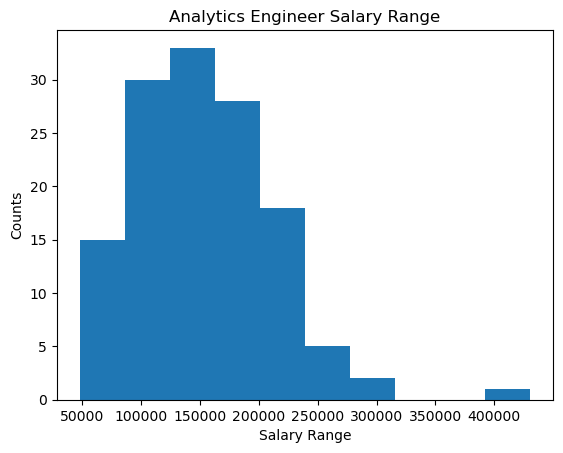

Analytics Engineer central tendency
154258.96212121213
149400.0
0    130000
1    150000
2    165000
3    170000
4    200000
Name: Salary in USD, dtype: int64
The minimum salary of an Analytics Engineer 48000
The maximum salary of an Analytics Engineer 430640
-------------------------------------------------------------------
Analytics Engineer central tendency
NormaltestResult(statistic=0.7379848456221527, pvalue=0.6914306495311189)
NormaltestResult(statistic=22.541073118711083, pvalue=1.2742896748713693e-05)
-------------------------------------------------------------------
The lower quartile of Analytics Engineer salary is: 113075.0
The upper quartile of Analytics Engineer salary is: 192292.5
The interquartile range of Analytics Engineer salary is: 79217.5
The the median of salary Analytics Engineer is: 149400.0 
Values below -5751.25 could be outliers.
Values above 311118.75 could be outliers.
-------------------------------------------------------------------
The minimum median in

<Figure size 640x480 with 0 Axes>

In [26]:
#Analytics Engineer summary analysis

plt.hist(analytics_engineer['Salary in USD'])
plt.xlabel('Salary Range')
plt.ylabel('Counts')
plt.title('Analytics Engineer Salary Range')
plt.show()
print(f"Analytics Engineer central tendency")
print(analytics_engineer['Salary in USD'].mean())
print(analytics_engineer['Salary in USD'].median())
print(analytics_engineer['Salary in USD'].mode())
print(f"The minimum salary of an Analytics Engineer {analytics_engineer['Salary in USD'].min()}")
print(f"The maximum salary of an Analytics Engineer {analytics_engineer['Salary in USD'].max()}")

# Save the figure
plt.savefig("data visuals/analytics_engineer_salary_range.png")

print("-------------------------------------------------------------------")

print(f"Analytics Engineer central tendency")
print(st.normaltest(analytics_engineer["Salary in USD"].sample(40)))
print(st.normaltest(analytics_engineer["Salary in USD"].sample(90)))

print("-------------------------------------------------------------------")

quartiles = analytics_engineer['Salary in USD'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Analytics Engineer salary is: {lowerq}")
print(f"The upper quartile of Analytics Engineer salary is: {upperq}")
print(f"The interquartile range of Analytics Engineer salary is: {iqr}")
print(f"The the median of salary Analytics Engineer is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

analytics_engineer_quartiles = analytics_engineer.loc[(analytics_engineer['Salary in USD'] < lower_bound) |
                                          (analytics_engineer['Salary in USD'] > upper_bound)]
analytics_engineer_quartiles

print("-------------------------------------------------------------------")

print(f"The minimum median income of the potential outliers is {analytics_engineer_quartiles['Salary in USD'].min()}")
print(f"The maximum median income of the potential outliers is {analytics_engineer_quartiles['Salary in USD'].max()}")

print("-------------------------------------------------------------------")

In [27]:
# filter the data to patron types with greater than the value set for min_checkouts
experience_senior = analytics_engineer.loc[analytics_engineer['Experience Level']== "Senior",:]
experience_senior.head()

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
10,10,Analytics Engineer,Full-Time,Senior,Expert,208500,United States Dollar,United States,208500,United States,Medium,2023
11,11,Analytics Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
53,81,Analytics Engineer,Full-Time,Senior,Expert,150000,United States Dollar,United States,150000,United States,Medium,2023
54,82,Analytics Engineer,Full-Time,Senior,Expert,120000,United States Dollar,United States,120000,United States,Medium,2023
102,150,Analytics Engineer,Full-Time,Senior,Expert,235400,United States Dollar,United States,235400,United States,Medium,2023


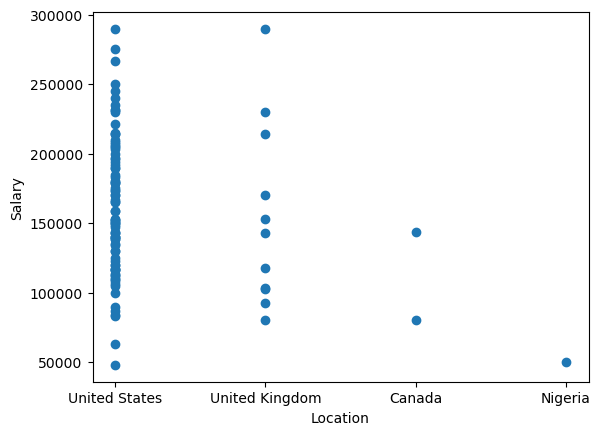

In [28]:
# Build scatter plot
plt.scatter(experience_senior["Company Location"] , experience_senior["Salary in USD"])


# Incorporate the other graph properties
plt.xlabel("Location")
plt.ylabel("Salary")


# Show plot
plt.show()

In [29]:
#Minimum Salary by Job Title
print(f"The minimum salary of an Machine Learning Engineer ${machine_learning_engineer['Salary in USD'].min()}")
print(f"The minimum salary of an Data Analyst ${data_analyst['Salary in USD'].min()}")
print(f"The minimum salary of an Data Engineer ${data_engineer['Salary in USD'].min()}")
print(f"The minimum salary of an Data Scientist ${data_scientist['Salary in USD'].min()}")
print(f"The minimum salary of an Analytics Engineer ${analytics_engineer['Salary in USD'].min()}")

The minimum salary of an Machine Learning Engineer $20000
The minimum salary of an Data Analyst $15000
The minimum salary of an Data Engineer $17025
The minimum salary of an Data Scientist $16000
The minimum salary of an Analytics Engineer $48000


In [30]:
#Median Salary by Job Title
print(f"The median salary of an Machine Learning Engineer ${machine_learning_engineer['Salary in USD'].median()}")
print(f"The median salary of an Data Analyst ${data_analyst['Salary in USD'].median()}")
print(f"The median salary of an Data Engineer ${data_engineer['Salary in USD'].median()}")
print(f"The median salary of an Data Scientist ${data_scientist['Salary in USD'].median()}")
print(f"The median salary of an Analytics Engineer ${analytics_engineer['Salary in USD'].median()}")

The median salary of an Machine Learning Engineer $161310.0
The median salary of an Data Analyst $105320.0
The median salary of an Data Engineer $135223.0
The median salary of an Data Scientist $140000.0
The median salary of an Analytics Engineer $149400.0


In [31]:
#Maximum Salary by Job Title
print(f"The maximum salary of an Machine Learning Engineer ${machine_learning_engineer['Salary in USD'].max()}")
print(f"The maximum salary of an Data Analyst ${data_analyst['Salary in USD'].max()}")
print(f"The maximum salary of an Data Engineer ${data_engineer['Salary in USD'].max()}")
print(f"The maximum salary of an Data Scientist ${data_scientist['Salary in USD'].max()}")
print(f"The maximum salary of an Analytics Engineer ${analytics_engineer['Salary in USD'].max()}")

The maximum salary of an Machine Learning Engineer $392000
The maximum salary of an Data Analyst $430967
The maximum salary of an Data Engineer $333500
The maximum salary of an Data Scientist $412000
The maximum salary of an Analytics Engineer $430640
